<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/20_Keras_tuner_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/diabetes.csv')

In [5]:
df.sample(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1


In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [9]:
X.shape

(768, 8)

In [10]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X.shape[1]))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(X_train_scaled,y_train,epochs=150,validation_data=(X_test_scaled,y_test))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6411 - loss: 0.6760 - val_accuracy: 0.6623 - val_loss: 0.6274
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5999 - val_accuracy: 0.7143 - val_loss: 0.5863
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.5468 - val_accuracy: 0.7143 - val_loss: 0.5568
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7678 - loss: 0.5025 - val_accuracy: 0.7338 - val_loss: 0.5386
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.4850 - val_accuracy: 0.7338 - val_loss: 0.5272
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.4968 - val_accuracy: 0.7532 - val_loss: 0.5157
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.4450 - val_accuracy: 0.7727 - val_loss: 0.5115
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.4612 - val_accuracy: 0.7468 - v

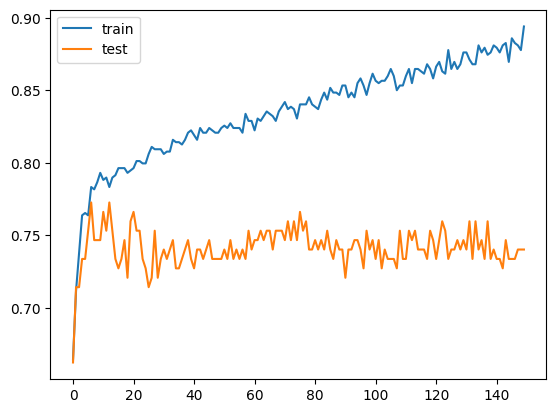

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(history.history['accuracy'],label='train')
sns.lineplot(history.history['val_accuracy'],label='test')
plt.show()

In [15]:
pip install --upgrade keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.7 MB/s eta 0:00:00


In [16]:
import keras_tuner as kt

In [17]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(32,activation='relu',input_dim=X.shape[1]))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [18]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 4 Complete [00h 00m 05s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 20s


In [20]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [21]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test,y_test),initial_epoch=51,batch_size=32,epochs=150)

Epoch 52/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7766 - loss: 0.4495 - val_accuracy: 0.3571 - val_loss: 61.0319
Epoch 53/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4355 - val_accuracy: 0.3571 - val_loss: 62.2881
Epoch 54/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - loss: 0.4421 - val_accuracy: 0.3571 - val_loss: 61.6613
Epoch 55/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.4202 - val_accuracy: 0.3571 - val_loss: 65.0342
Epoch 56/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7539 - loss: 0.4476 - val_accuracy: 0.3571 - val_loss: 65.5776
Epoch 57/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4122 - val_accuracy: 0.3571 - val_loss: 66.4568
Epoch 58/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4298 - val_accuracy: 0.3571 - val_loss: 66.5130
Epoch 59/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.4459 - val_accur

In [23]:
# no. of neuron

In [24]:
def build_model(hp):
  model1=Sequential()
  units=hp.Choice('units',values=[8,16,32,64,128])
  model1.add(Dense(units,activation='relu',input_dim=X.shape[1]))
  model1.add(Dense(units,activation='relu'))
  model1.add(Dense(units,activation='relu'))
  model1.add(Dense(1,activation='sigmoid'))

  model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model1

In [25]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='kt_tuner',project_name='no_of_neurons_tuner')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 27s


In [27]:
tuner.get_best_hyperparameters()[0].values

{'units': 32}

In [28]:
model1=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history1=model1.fit(X_train_scaled,y_train,epochs=150,initial_epoch=51,validation_data=(X_test,y_test))

Epoch 52/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7720 - loss: 0.4863 - val_accuracy: 0.3571 - val_loss: 46.1425
Epoch 53/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.4731 - val_accuracy: 0.3571 - val_loss: 51.0388
Epoch 54/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7630 - loss: 0.4598 - val_accuracy: 0.3571 - val_loss: 50.3816
Epoch 55/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.4364 - val_accuracy: 0.3571 - val_loss: 55.6278
Epoch 56/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4423 - val_accuracy: 0.3571 - val_loss: 61.8909
Epoch 57/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4315 - val_accuracy: 0.3571 - val_loss: 63.6323
Epoch 58/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4374 - val_accuracy: 0.3571 - val_loss: 63.9834
Epoch 59/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4595 - val_accur

In [31]:
def build_model(hp):
  model2=Sequential()
  model2.add(Dense(16,activation='relu',input_dim=X.shape[1]))

  units=hp.Int('no_of_layers',min_value=1,max_value=10)
  for i in range(units):
    model2.add(Dense(16,activation='relu'))
  model2.add(Dense(1,activation='sigmoid'))
  model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model2

In [32]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='kt_tuner1',project_name='layers_tuner')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history2=tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 31s


In [34]:
tuner.get_best_hyperparameters()[0].values

{'no_of_layers': 10}

In [35]:
model2=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
history2=model2.fit(X_train_scaled,y_train,epochs=150,initial_epoch=51,validation_data=(X_test_scaled,y_test),batch_size=32)

Epoch 52/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9778 - loss: 0.1067 - val_accuracy: 0.7208 - val_loss: 1.1191
Epoch 53/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - loss: 0.1169 - val_accuracy: 0.7143 - val_loss: 1.2203
Epoch 54/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9469 - loss: 0.1889 - val_accuracy: 0.7013 - val_loss: 1.1072
Epoch 55/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0844 - val_accuracy: 0.7208 - val_loss: 1.1615
Epoch 56/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.2070 - val_accuracy: 0.6948 - val_loss: 1.1358
Epoch 57/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.3099 - val_accuracy: 0.7013 - val_loss: 0.9275
Epoch 58/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9362 - loss: 0.1862 - val_accuracy: 0.7338 - val_loss: 0.7776
Epoch 59/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9486 - loss: 0.1612 - val_accuracy: 0.

In [38]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [39]:
# trying all

In [50]:
def build_model(hp):
  model3=Sequential()

  counter=0

  for i in range(hp.Int('layers',min_value=1,max_value=10)):
    if counter==0:
      model3.add(Dense(hp.Choice('units'+str(i),values=[8,16,32,64]),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),input_dim=X.shape[1]))
    else:
      model3.add(Dense(hp.Choice('units'+str(i),values=[8,16,32,64]),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
    counter +=1
  model3.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['rmsprop','adam','adadelta','sgd'])
  model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model3


In [51]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='kt_tuner_hp',project_name='dl_hpt')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 28s


In [54]:
tuner.get_best_hyperparameters()[0].values

{'layers': 10,
 'units0': 64,
 'activation0': 'tanh',
 'optimizer': 'rmsprop',
 'units1': 32,
 'activation1': 'relu',
 'units2': 16,
 'activation2': 'sigmoid',
 'units3': 8,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu',
 'units9': 8,
 'activation9': 'relu'}

In [55]:
model3=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
history3=model3.fit(X_train_scaled,y_train,epochs=230,initial_epoch=51,validation_data=(X_test_scaled,y_test))

Epoch 52/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7574 - loss: 0.5049 - val_accuracy: 0.7597 - val_loss: 0.5345
Epoch 53/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7761 - loss: 0.4850 - val_accuracy: 0.7143 - val_loss: 0.5329
Epoch 54/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.4416 - val_accuracy: 0.7208 - val_loss: 0.5280
Epoch 55/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7724 - loss: 0.4688 - val_accuracy: 0.7597 - val_loss: 0.5243
Epoch 56/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.4494 - val_accuracy: 0.7468 - val_loss: 0.5232
Epoch 57/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8075 - loss: 0.4116 - val_accuracy: 0.7403 - val_loss: 0.5174
Epoch 58/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7881 - loss: 0.4469 - val_accuracy: 0.7532 - val_loss: 0.5201
Epoch 59/230
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7464 - loss: 0.4890 - val_accuracy: 0

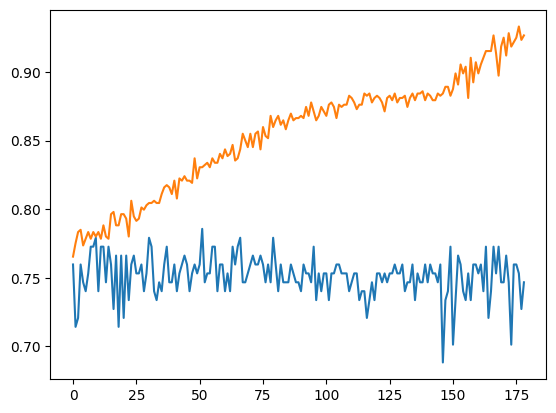

In [58]:
sns.lineplot(history3.history['val_accuracy'])
sns.lineplot(history3.history['accuracy'])
plt.show()

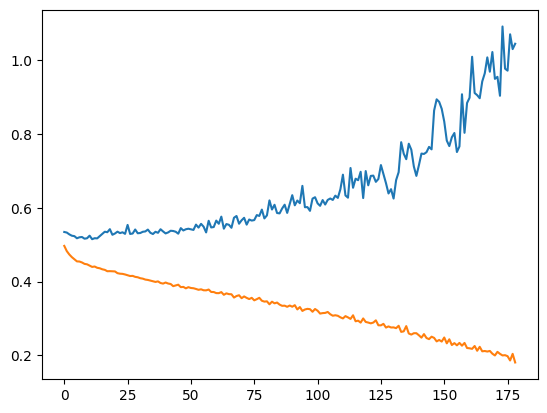

In [59]:
sns.lineplot(history3.history['val_loss'])
sns.lineplot(history3.history['loss'])
plt.show()

In [60]:
# using dropout

In [66]:
def build_model(hp):
  model4=Sequential()

  counter=0

  for i in range(hp.Int('layers',min_value=1,max_value=10)):
    if counter==0:
      model4.add(Dense(hp.Choice('units'+str(i),values=[8,16,32,64]),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),input_dim=X.shape[1]))
      model4.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5,0.6])))
    else:
      model4.add(Dense(hp.Choice('units'+str(i),values=[8,16,32,64]),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
      model4.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5,0.6])))
    counter +=1
  model4.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['rmsprop','adam','adadelta','sgd'])
  model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model4


In [67]:
tuner=kt.RandomSearch(build_model,objective=['val_accuracy'],max_trials=25,directory='final_tuning',project_name='final_hp')

In [68]:
tuner.search(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Trial 25 Complete [00h 00m 11s]
multi_objective: -0.3571428656578064

Best multi_objective So Far: -0.8051947951316833
Total elapsed time: 00h 04m 35s


In [69]:
tuner.get_best_hyperparameters()[0].values

{'layers': 3,
 'units0': 32,
 'activation0': 'relu',
 'dropout0': 0.4,
 'optimizer': 'sgd',
 'units1': 16,
 'activation1': 'tanh',
 'dropout1': 0.3,
 'units2': 32,
 'activation2': 'tanh',
 'dropout2': 0.5,
 'units3': 8,
 'activation3': 'tanh',
 'dropout3': 0.6,
 'units4': 64,
 'activation4': 'relu',
 'dropout4': 0.6,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.2,
 'units6': 64,
 'activation6': 'tanh',
 'dropout6': 0.6,
 'units7': 8,
 'activation7': 'sigmoid',
 'dropout7': 0.6,
 'units8': 16,
 'activation8': 'relu',
 'dropout8': 0.5,
 'units9': 64,
 'activation9': 'relu',
 'dropout9': 0.3}

In [71]:
model4=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
history4=model4.fit(X_train_scaled,y_train,epochs=300,initial_epoch=101,validation_data=(X_test_scaled,y_test))

Epoch 102/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7262 - loss: 0.5157 - val_accuracy: 0.7922 - val_loss: 0.4826
Epoch 103/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7373 - loss: 0.5368 - val_accuracy: 0.8052 - val_loss: 0.4823
Epoch 104/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 0.5497 - val_accuracy: 0.7987 - val_loss: 0.4825
Epoch 105/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5013 - val_accuracy: 0.7987 - val_loss: 0.4821
Epoch 106/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5220 - val_accuracy: 0.7922 - val_loss: 0.4815
Epoch 107/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.5286 - val_accuracy: 0.7987 - val_loss: 0.4805
Epoch 108/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.5656 - val_accuracy: 0.7922 - val_loss: 0.4818
Epoch 109/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.5262 - val_accu

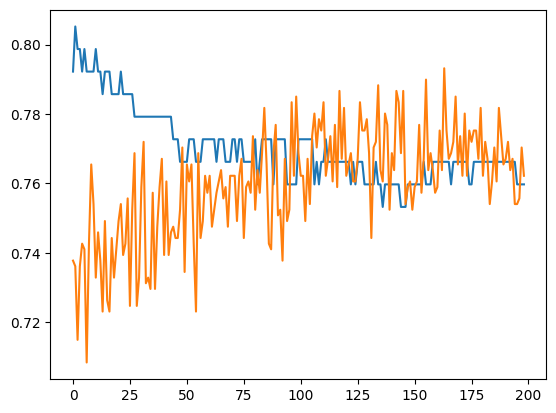

In [75]:
sns.lineplot(history4.history['val_accuracy'])
sns.lineplot(history4.history['accuracy'])
plt.show()

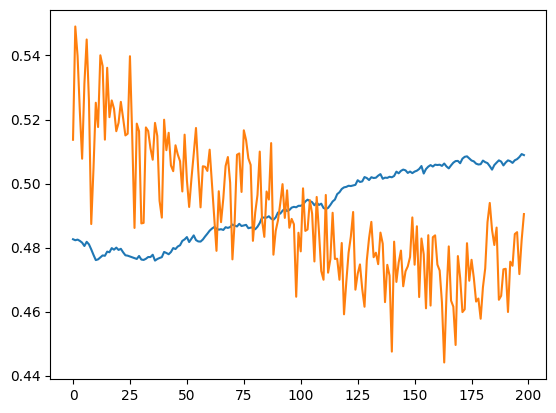

In [76]:
sns.lineplot(history4.history['val_loss'])
sns.lineplot(history4.history['loss'])
plt.show()